# Tree Ensembles and Random Forests - Lab

## Introduction

In this lab, we'll create some popular tree ensemble models such as a bag of trees and random forest to predict a person's salary based on information about them. 

## Objectives

In this lab you will: 

- Train a random forest model using `scikit-learn`  
- Access, visualize, and interpret feature importances from an ensemble model 

## Import data

In this lab, you'll use personal attributes to predict whether people make more than 50k/year.  The dataset was extracted from the census bureau database. The goal is to use this dataset to try and draw conclusions regarding what drives salaries. More specifically, the target variable is categorical (> 50k and <= 50 k). Let's create a classification tree!

To get started, run the cell below to import everything we'll need for this lab. 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Our dataset is stored in the file `'salaries_final.csv'`.  

In the cell below, import the dataset from this file and store it in a DataFrame. Be sure to set the `index_col` parameter to `0`.  Then, display the `.head()` of the DataFrame to ensure that everything loaded correctly.

In [16]:
# Import the data
salaries = pd.read_csv('salaries_final.csv', index_col=0)

# Display the first few rows of the dataset
print(salaries.head())

# Get a summary of the dataset
print(salaries.describe())

# Check for missing values
print(salaries.isnull().sum())


   Age  Education         Occupation   Relationship   Race     Sex Target
0   39  Bachelors       Adm-clerical  Not-in-family  White    Male  <=50K
1   50  Bachelors    Exec-managerial        Husband  White    Male  <=50K
2   38    HS-grad  Handlers-cleaners  Not-in-family  White    Male  <=50K
3   53       11th  Handlers-cleaners        Husband  Black    Male  <=50K
4   28  Bachelors     Prof-specialty           Wife  Black  Female  <=50K
                Age
count  32561.000000
mean      38.581647
std       13.640433
min       17.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       90.000000
Age             0
Education       0
Occupation      0
Relationship    0
Race            0
Sex             0
Target          0
dtype: int64


In total, there are 6 predictors, and one outcome variable, the salary, `Target` - `<= 50k` and `>50k`.

The 6 predictors are:

- `Age`: continuous 

- `Education`: Categorical. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool 

- `Occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces 

- `Relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried 

- `Race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

- `Sex`: Female, Male 

First, we'll need to store our `'Target'` column in a separate variable and drop it from the dataset.  

Do this in the cell below. 

In [17]:
# Split the outcome and predictor variables
# Assuming the dataset is already loaded into the 'salaries' DataFrame
# Separate the target variable
y = salaries['Target']

# Drop the target variable from the dataset
X = salaries.drop('Target', axis=1)

# Display the first few rows of the predictors
print(X.head())


   Age  Education         Occupation   Relationship   Race     Sex
0   39  Bachelors       Adm-clerical  Not-in-family  White    Male
1   50  Bachelors    Exec-managerial        Husband  White    Male
2   38    HS-grad  Handlers-cleaners  Not-in-family  White    Male
3   53       11th  Handlers-cleaners        Husband  Black    Male
4   28  Bachelors     Prof-specialty           Wife  Black  Female


In the cell below, examine the data type of each column:  

In [18]:
# Your code here
# Display the data types of each column
# Examine the data type of each column
print(X.dtypes)



Age              int64
Education       object
Occupation      object
Relationship    object
Race            object
Sex             object
dtype: object


Great. `'Age'` is numeric, as it should be. Now we're ready to create some dummy columns and deal with our categorical variables.  

In the cell below, use Pandas to create dummy columns for each of categorical variables. If you're unsure of how to do this, check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).  

In [19]:
# Create dummy columns for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the updated DataFrame
print(X.head())



   Age  Education_11th  Education_12th  Education_1st-4th  Education_5th-6th  \
0   39           False           False              False              False   
1   50           False           False              False              False   
2   38           False           False              False              False   
3   53            True           False              False              False   
4   28           False           False              False              False   

   Education_7th-8th  Education_9th  Education_Assoc-acdm  \
0              False          False                 False   
1              False          False                 False   
2              False          False                 False   
3              False          False                 False   
4              False          False                 False   

   Education_Assoc-voc  Education_Bachelors  ...  Relationship_Not-in-family  \
0                False                 True  ...                        

Now, split `data` and `target` into 75/25 training and test sets. Set the `random_state` to 123.  

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')



X_train shape: (24420, 40)
X_test shape: (8141, 40)
y_train shape: (24420,)
y_test shape: (8141,)


## Build a "regular" tree as a baseline

We'll begin by fitting a regular decision tree classifier, so that we have something to compare our ensemble methods to.  

### Build the tree

In the cell below, instantiate and fit a decision tree classifier. Set the `criterion` to `'gini'`, and a `max_depth` of `5`.  Then, fit the tree to the training data and labels.   

In [21]:
# Initialize the Decision Tree Classifier with specified parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123)


# Train the model
tree_clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=123)

### Feature importance

Let's quickly examine how important each feature ended up being in our decision tree model. Check the `feature_importances_` attribute of the trained model to see what it displays. 

In [22]:
# Retrieve feature importances
feature_importances = tree_clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances_df)



                         Feature  Importance
0                            Age    0.304469
39                      Sex_Male    0.154386
34             Relationship_Wife    0.137742
25     Occupation_Prof-specialty    0.130196
19    Occupation_Exec-managerial    0.108651
30    Relationship_Not-in-family    0.101885
11             Education_HS-grad    0.017702
12             Education_Masters    0.013624
9            Education_Bachelors    0.011747
23      Occupation_Other-service    0.011269
10           Education_Doctorate    0.007314
32        Relationship_Own-child    0.000560
26    Occupation_Protective-serv    0.000455
27              Occupation_Sales    0.000000
28       Occupation_Tech-support    0.000000
29   Occupation_Transport-moving    0.000000
2                 Education_12th    0.000000
31   Relationship_Other-relative    0.000000
24    Occupation_Priv-house-serv    0.000000
35       Race_Asian-Pac-Islander    0.000000
36                    Race_Black    0.000000
37        

That matrix isn't very helpful, but a visualization of the data it contains could be.  Run the cell below to plot a visualization of the feature importances for this model. 

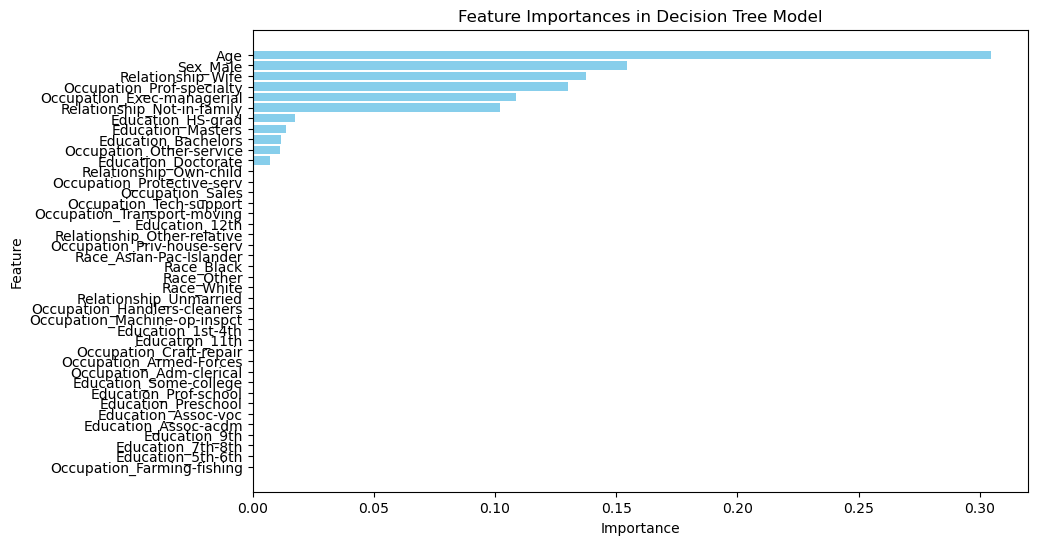

In [23]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


### Model performance

Next, let's see how well our model performed on the test data. 

In the cell below:

* Use the model to generate predictions on the test set  
* Print out a `confusion_matrix` of the test set predictions 
* Print out a `classification_report` of the test set predictions 

In [24]:
# Make predictions on the test set
y_pred = tree_clf.predict(X_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)




Confusion Matrix:
[[5825  340]
 [1201  775]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      6165
        >50K       0.70      0.39      0.50      1976

    accuracy                           0.81      8141
   macro avg       0.76      0.67      0.69      8141
weighted avg       0.80      0.81      0.79      8141



Now, let's check the model's accuracy. Run the cell below to display the test set accuracy of the model. 

In [25]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Test Set Accuracy: {accuracy:.4f}')


Test Set Accuracy: 0.8107


## Bagged trees

The first ensemble approach we'll try is a bag of trees. This will make use of **_Bagging_**, along with a number of decision tree classifier models.  

Now, let's instantiate a [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  First, initialize a `DecisionTreeClassifier` and set the same parameters that we did above for `criterion` and `max_depth`.  Also set the `n_estimators` parameter for our `BaggingClassifier` to `20`. 

In [28]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Import the data
salaries = pd.read_csv('salaries_final.csv', index_col=0)

# Display the first few rows of the dataset
print(salaries.head())

# Get a summary of the dataset
print(salaries.describe())

# Check for missing values
print(salaries.isnull().sum())

# Separate the target variable
y = salaries['Target']

# Drop the target variable from the dataset
X = salaries.drop('Target', axis=1)

# Display the first few rows of the predictors
print(X.head())

# Examine the data type of each column
print(X.dtypes)

# Create dummy columns for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the updated DataFrame
print(X.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Initialize the Decision Tree Classifier with specified parameters
base_tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123)

# Initialize the Bagging Classifier with the Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=base_tree_clf, n_estimators=20, random_state=123)




   Age  Education         Occupation   Relationship   Race     Sex Target
0   39  Bachelors       Adm-clerical  Not-in-family  White    Male  <=50K
1   50  Bachelors    Exec-managerial        Husband  White    Male  <=50K
2   38    HS-grad  Handlers-cleaners  Not-in-family  White    Male  <=50K
3   53       11th  Handlers-cleaners        Husband  Black    Male  <=50K
4   28  Bachelors     Prof-specialty           Wife  Black  Female  <=50K
                Age
count  32561.000000
mean      38.581647
std       13.640433
min       17.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       90.000000
Age             0
Education       0
Occupation      0
Relationship    0
Race            0
Sex             0
Target          0
dtype: int64
   Age  Education         Occupation   Relationship   Race     Sex
0   39  Bachelors       Adm-clerical  Not-in-family  White    Male
1   50  Bachelors    Exec-managerial        Husband  White    Male
2   38    HS-grad  Handlers-cleaners

Great! Now, fit it to our training data. 

In [29]:
# Fit to the training data
# Fit the Bagging Classifier to the training data
bagging_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=123),
                  n_estimators=20, random_state=123)

Checking the accuracy of a model is such a common task that all (supervised learning) models have a `.score()` method that wraps the `accuracy_score()` helper function we've been using. All we have to do is pass it a dataset and the corresponding labels and it will return the accuracy score for those data/labels.  

Let's use it to get the training accuracy of our model. In the cell below, call the `.score()` method on our bagging model and pass in our training data and training labels as parameters. 

In [30]:
# Training accuracy score
# Get the training accuracy of the Bagging Classifier
training_accuracy = bagging_clf.score(X_train, y_train)

# Print the training accuracy
print(f'Training Set Accuracy for Bagging Classifier: {training_accuracy:.4f}')


Training Set Accuracy for Bagging Classifier: 0.8181


Now, let's check the accuracy score that really matters -- our testing accuracy.  This time, pass in our testing data and labels to see how the model did.  

In [31]:
# Test accuracy score
# Get the testing accuracy of the Bagging Classifier
testing_accuracy = bagging_clf.score(X_test, y_test)

# Print the testing accuracy
print(f'Testing Set Accuracy for Bagging Classifier: {testing_accuracy:.4f}')


Testing Set Accuracy for Bagging Classifier: 0.8172


## Random forests

Another popular ensemble method is the **_Random Forest_**. Let's fit a random forest classifier next and see how it measures up compared to all the others. 

### Fit a random forests model

In the cell below, instantiate and fit a `RandomForestClassifier`, and set the number estimators to `100` and the max depth to `5`. Then, fit the model to our training data. 

In [32]:
# Instantiate and fit a RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Import the data
salaries = pd.read_csv('salaries_final.csv', index_col=0)

# Display the first few rows of the dataset
print(salaries.head())

# Get a summary of the dataset
print(salaries.describe())

# Check for missing values
print(salaries.isnull().sum())

# Separate the target variable
y = salaries['Target']

# Drop the target variable from the dataset
X = salaries.drop('Target', axis=1)

# Display the first few rows of the predictors
print(X.head())

# Examine the data type of each column
print(X.dtypes)

# Create dummy columns for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the updated DataFrame
print(X.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Initialize the Decision Tree Classifier with specified parameters
base_tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=123)

# Initialize the Bagging Classifier with the Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=base_tree_clf, n_estimators=20, random_state=123)

# Fit the Bagging Classifier to the training data
bagging_clf.fit(X_train, y_train)

# Get the training accuracy of the Bagging Classifier
training_accuracy = bagging_clf.score(X_train, y_train)

# Print the training accuracy
print(f'Training Set Accuracy for Bagging Classifier: {training_accuracy:.4f}')

# Get the testing accuracy of the Bagging Classifier
testing_accuracy = bagging_clf.score(X_test, y_test)

# Print the testing accuracy
print(f'Testing Set Accuracy for Bagging Classifier: {testing_accuracy:.4f}')

# Initialize the Random Forest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the Random Forest Classifier to the training data
random_forest_clf.fit(X_train, y_train)

# Get the training accuracy of the Random Forest Classifier
training_accuracy_rf = random_forest_clf.score(X_train, y_train)

# Get the testing accuracy of the Random Forest Classifier
testing_accuracy_rf = random_forest_clf.score(X_test, y_test)

# Print the training and testing accuracies
print(f'Training Set Accuracy for Random Forest Classifier: {training_accuracy_rf:.4f}')
print(f'Testing Set Accuracy for Random Forest Classifier: {testing_accuracy_rf:.4f}')


   Age  Education         Occupation   Relationship   Race     Sex Target
0   39  Bachelors       Adm-clerical  Not-in-family  White    Male  <=50K
1   50  Bachelors    Exec-managerial        Husband  White    Male  <=50K
2   38    HS-grad  Handlers-cleaners  Not-in-family  White    Male  <=50K
3   53       11th  Handlers-cleaners        Husband  Black    Male  <=50K
4   28  Bachelors     Prof-specialty           Wife  Black  Female  <=50K
                Age
count  32561.000000
mean      38.581647
std       13.640433
min       17.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       90.000000
Age             0
Education       0
Occupation      0
Relationship    0
Race            0
Sex             0
Target          0
dtype: int64
   Age  Education         Occupation   Relationship   Race     Sex
0   39  Bachelors       Adm-clerical  Not-in-family  White    Male
1   50  Bachelors    Exec-managerial        Husband  White    Male
2   38    HS-grad  Handlers-cleaners

Now, let's check the training and testing accuracy of the model using its `.score()` method: 

In [33]:
# Training accuracy score
# Get the training accuracy of the Random Forest Classifier
training_accuracy_rf = random_forest_clf.score(X_train, y_train)

# Print the training accuracy
print(f'Training Set Accuracy for Random Forest Classifier: {training_accuracy_rf:.4f}')


Training Set Accuracy for Random Forest Classifier: 0.9048


In [34]:
# Test accuracy score
# Get the testing accuracy of the Random Forest Classifier
testing_accuracy_rf = random_forest_clf.score(X_test, y_test)

# Print the testing accuracy
print(f'Testing Set Accuracy for Random Forest Classifier: {testing_accuracy_rf:.4f}')


Testing Set Accuracy for Random Forest Classifier: 0.8048


### Feature importance

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in the Random Forest Model')
    plt.show()


Note: "relationship" represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship, so it is a bit of a weird attribute.

Also note that more features show up. This is a pretty typical result. 

### Look at the trees in your forest

Let's create a forest with some small trees. You'll learn how to access trees in your forest!

In the cell below, create another `RandomForestClassifier`.  Set the number of estimators to 5, the `max_features` to 10, and the `max_depth` to 2.

In [38]:
# Instantiate and fit a RandomForestClassifier
# Initialize the Random Forest Classifier with specified parameters
small_trees_forest = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2, random_state=123)

# Fit the Random Forest Classifier to the training data
small_trees_forest.fit(X_train, y_train)



RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5,
                       random_state=123)

Making `max_features` smaller will lead to very different trees in your forest! The trees in your forest are stored in the `.estimators_` attribute.

In the cell below, get the first tree from `forest_2.estimators_` and store it in `rf_tree_1`

In [39]:
# First tree from forest_2
# First tree from small_trees_forest
rf_tree_1 = small_trees_forest.estimators_[0]


Now, we can reuse our `plot_feature_importances()` function to visualize which features this tree was given to use duing subspace sampling. 

In the cell below, call `plot_feature_importances()` on `rf_tree_1`.

In [40]:
# Feature importance
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()


Now, grab the second tree and store it in `rf_tree_2`, and then pass it to `plot_feature_importances()` in the following cell so we can compare which features were most useful to each. 

In [41]:
# Second tree from forest_2
# Second tree from small_trees_forest
rf_tree_2 = small_trees_forest.estimators_[1]


We can see by comparing the two plots that the two trees we examined from our random forest look at different attributes, and have wildly different feature importances!

## Summary

In this lab, we got some practice creating a few different tree ensemble methods. We also learned how to visualize feature importances, and compared individual trees from a random forest to see if we could notice the differences in the features they were trained on. 